# Password Strength classification

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [4]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
data.shape

(669640, 2)

In [7]:
data.dropna(inplace=True)

In [8]:
password_tuple = np.array(data)

In [9]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [10]:
import random
random.shuffle(password_tuple)#shuffling randomly fro robustness

In [11]:
y=[labels[1] for labels in password_tuple]

In [12]:
X=[labels[0] for labels in password_tuple]

In [13]:
import seaborn as sns

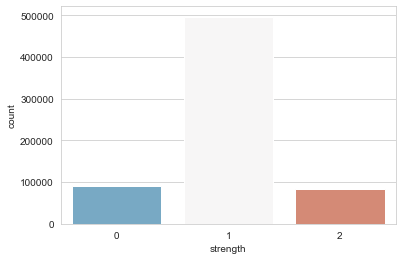

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='strength', data=data,palette='RdBu_r')

## vectorizing


In [15]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer # notice the spelling with the f before Vectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [17]:
X.shape

(669639, 131)

In [18]:
vectorizer.vocabulary_

{'k': 61,
 'z': 76,
 'd': 54,
 'e': 55,
 '5': 34,
 '7': 36,
 'i': 59,
 'n': 64,
 'o': 65,
 '3': 32,
 '4': 33,
 'v': 72,
 's': 69,
 '1': 30,
 'y': 75,
 'r': 68,
 'm': 63,
 'g': 57,
 '2': 31,
 'u': 71,
 '6': 35,
 'c': 53,
 '8': 37,
 'h': 58,
 'w': 73,
 'l': 62,
 'a': 51,
 'b': 52,
 'j': 60,
 't': 70,
 'f': 56,
 '9': 38,
 '0': 29,
 'p': 66,
 '@': 44,
 '-': 26,
 'q': 67,
 'x': 74,
 '.': 27,
 '!': 16,
 '&': 21,
 '?': 43,
 '>': 42,
 '<': 40,
 ';': 39,
 '_': 49,
 '%': 20,
 '"': 17,
 '~': 80,
 '+': 25,
 '^': 48,
 '/': 28,
 '$': 19,
 ')': 23,
 ' ': 15,
 '#': 18,
 '*': 24,
 '±': 89,
 '\\': 46,
 '{': 77,
 '}': 79,
 '=': 41,
 '[': 45,
 '(': 22,
 '`': 50,
 'ú': 119,
 ']': 47,
 '\x1c': 13,
 'þ': 123,
 'ó': 113,
 'ô': 114,
 '³': 91,
 '\x16': 9,
 'ò': 112,
 '·': 94,
 '\x1e': 14,
 '\x19': 11,
 '¿': 97,
 'ß': 98,
 '|': 78,
 '\x05': 2,
 '\x1b': 12,
 'ä': 102,
 'õ': 115,
 'ð': 110,
 'å': 103,
 'â': 101,
 'ÿ': 124,
 '\x08': 4,
 'ê': 108,
 'á': 100,
 '¾': 96,
 '«': 86,
 '°': 88,
 '\x10': 6,
 '\x17': 10,
 'ý

In [19]:
data.iloc[0,0]

'kzde5577'

In [20]:
feature_names = vectorizer.get_feature_names()

#get tfidf vedtor first documnet
first_document_vector=X[0]

#print the scores

df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591241
5,0.566230
z,0.336548
k,0.292567
d,0.286188
e,0.221483
¾,0.000000
º,0.000000
·,0.000000
µ,0.000000


## Model Building 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
logistic = LogisticRegression(penalty='l2', multi_class='ovr')

In [24]:
logistic.fit(X_train,y_train)

C:\Users\vishal\AppData\Local\Continuum\anaconda3\envs\data_S\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
logistic.score(X_test, y_test)

0.8098306552774626

## 1.Multinomial

In [26]:
mul = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [27]:
mul.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
mul.score(X_test, y_test)

0.8167821516038468

In [29]:
## Pred

In [30]:
X_predict=np.array(["abc"])
X_predict=vectorizer.transform(X_predict)
y_pred=logistic.predict(X_predict)
print(y_pred)

[0]


## XgBoost Algorithm 

In [31]:
import xgboost as xgb

In [32]:
xgb_classifier=xgb.XGBClassifier()

In [33]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [34]:
X_predict=np.array(["@@123abc"])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_classifier.predict(X_predict)
print(y_pred)

[1]


## MultinominalNb

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()

In [36]:
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
nb_classifier.score(X_test,y_test)

0.7400692909623081

In [57]:
b=np.array(input())

bppa1


In [59]:
X_predict=np.array(["@@123abc"])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_classifier.predict(X_predict)
print(y_pred)

[1]


In [39]:
import pickle

In [ ]:
# Saving model to disk
pickle.dump(xgb_classifier, open('model.pkl','wb'))

In [64]:
with open('xgb_classifier.pkl','rb') as f:
    mp=pickle.load(f)